# Quantum Entanglement Swapping: Modified Bell
## State preparation

$ \vert\Phi^+\rangle_{\textcolor{red}{A}B} \otimes \vert\Phi^+\rangle_{C\textcolor{orange}{D}}$ replaced with:

$$ \vert\Phi^+\rangle_{\textcolor{red}{A}B} = \frac{1}{\sqrt{2}}\left(\vert0+\rangle_{AB} + \vert1-\rangle_{AB}\right)$$

$$ \vert\Psi^+\rangle_{C\textcolor{orange}{D}} = \frac{1}{\sqrt{2}}\left(\vert0-\rangle_{AB} + \vert1+\rangle_{AB}\right)$$

the curcuit to achive $\vert\Phi^+\rangle_{\textcolor{red}{A}B}$ is below:

   ┌───┐     ┌───┐
A: ┤ H ├──■──┤ H ├
   └───┘┌─┴─┐└───┘
B: ─────┤ X ├─────
        └───┘     
Statevector([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j],
            dims=(2, 2))


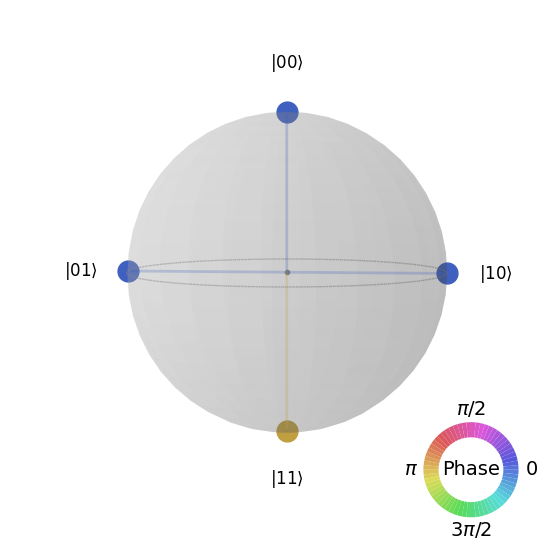

In [13]:
# Import necessary libraries from Qiskit
from qiskit import QuantumCircuit
from qiskit.circuit import QuantumRegister
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere

bell_fp = QuantumCircuit(QuantumRegister(1, 'A'), QuantumRegister(1, 'B'))
bell_fp.h(0)
bell_fp.cx(0, 1)
bell_fp.h(0)

sv_fp = Statevector([1,0,0,0])
new_sv_fp = sv_fp.evolve(bell_fp)

print(bell_fp)
print(new_sv_fp)
plot_state_qsphere(new_sv_fp)

the curcuit to achive $ \vert\Psi^+\rangle_{C\textcolor{orange}{D}}$ is below:

   ┌───┐     ┌───┐
A: ┤ H ├──■──┤ H ├
   └───┘┌─┴─┐├───┤
B: ─────┤ X ├┤ X ├
        └───┘└───┘
Statevector([ 0.5+0.j, -0.5+0.j,  0.5+0.j,  0.5+0.j],
            dims=(2, 2))


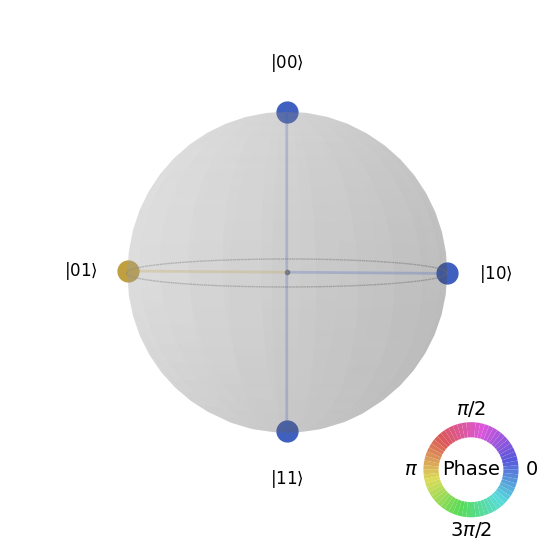

In [14]:
# Import necessary libraries from Qiskit
from qiskit import QuantumCircuit
from qiskit.circuit import QuantumRegister
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere

bell_pp = QuantumCircuit(QuantumRegister(1, 'A'), QuantumRegister(1, 'B'))
bell_pp.h(0)
bell_pp.cx(0, 1)
bell_pp.h(0)
bell_pp.x(1)

sv_pp = Statevector([1,0,0,0])
new_sv_pp = sv_pp.evolve(bell_pp)

print(bell_pp)
print(new_sv_pp)
plot_state_qsphere(new_sv_pp)

the curcuit to achive $\vert\Phi^+\rangle_{\textcolor{red}{A}B} \otimes \vert\Psi^+\rangle_{C\textcolor{orange}{D}}$ is below:

     ┌───┐     ┌───┐
  A: ┤ H ├──■──┤ H ├
     └───┘┌─┴─┐└───┘
  B: ─────┤ X ├─────
     ┌───┐└───┘┌───┐
  C: ┤ H ├──■──┤ H ├
     └───┘┌─┴─┐├───┤
  D: ─────┤ X ├┤ X ├
          └───┘└───┘
c: 2/═══════════════
                    
Statevector([ 0.25+0.j,  0.25+0.j,  0.25+0.j, -0.25+0.j, -0.25+0.j,
             -0.25+0.j, -0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,
              0.25+0.j, -0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,
             -0.25+0.j],
            dims=(2, 2, 2, 2))


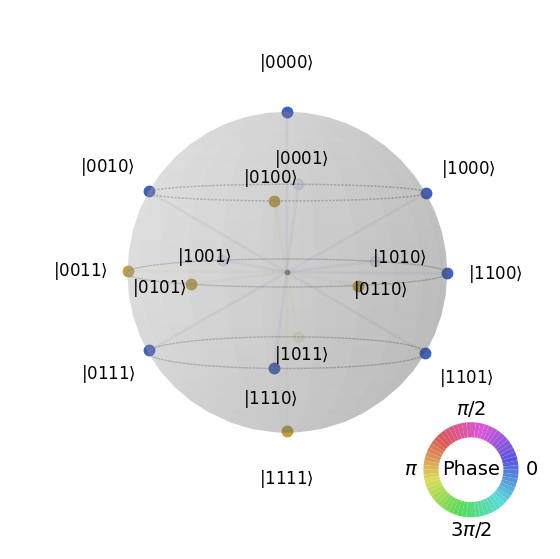

In [15]:
# Import necessary libraries from Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit.circuit import QuantumRegister, ClassicalRegister
from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import Estimator
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere

# Create a Modified Bell state quantum circuit
cr=ClassicalRegister(2,'c')
bell = QuantumCircuit(QuantumRegister(1, 'A'), QuantumRegister(1, 'B'), QuantumRegister(1, 'C'), QuantumRegister(1, 'D'), cr)
bell.h(0)
bell.cx(0, 1)
bell.h(0)

bell.h(2)
bell.cx(2, 3)
bell.h(2)
bell.x(3)


sv = Statevector([1,0,0,0, 0,0,0,0, 0,0,0,0, 0,0,0,0])
new_sv = sv.evolve(bell)

print(bell)
print(new_sv)
plot_state_qsphere(new_sv)

## Entanglement swap curcit

Original Circuit:
     ┌───┐     ┌───┐ ░                 ░ ┌───┐    ░ ┌───┐     ┌───┐ ░ ┌─┐   
  A: ┤ H ├──■──┤ H ├─░─────────────────░─┤ X ├─■──░─┤ H ├──■──┤ H ├─░─┤M├───
     └───┘┌─┴─┐└───┘ ░ ┌───┐     ┌───┐ ░ └─┬─┘ │  ░ └───┘  │  └───┘ ░ └╥┘   
  B: ─────┤ X ├──────░─┤ H ├──■──┤ H ├─░───┼───■──░────────┼────────░──╫────
     ┌───┐└───┘┌───┐ ░ └───┘┌─┴─┐└───┘ ░   │      ░        │        ░  ║    
  C: ┤ H ├──■──┤ H ├─░──────┤ X ├──────░───■──────░────────┼────────░──╫────
     └───┘┌─┴─┐├───┤ ░      └───┘      ░          ░      ┌─┴─┐      ░  ║ ┌─┐
  D: ─────┤ X ├┤ X ├─░─────────────────░──────────░──────┤ X ├──────░──╫─┤M├
          └───┘└───┘ ░                 ░          ░      └───┘      ░  ║ └╥┘
c: 2/══════════════════════════════════════════════════════════════════╩══╩═
                                                                       0  1 


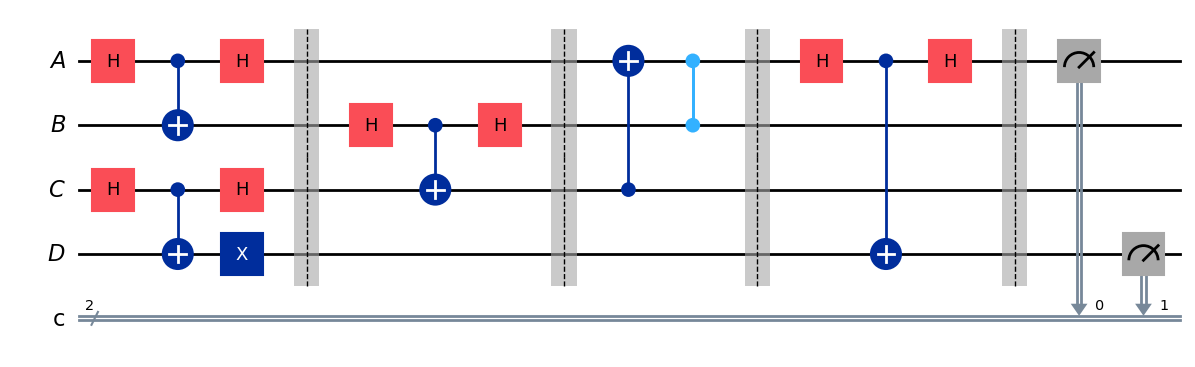

In [50]:
bell = QuantumCircuit(QuantumRegister(1, 'A'), QuantumRegister(1, 'B'), QuantumRegister(1, 'C'), QuantumRegister(1, 'D'), cr)
bell.h(0)
bell.cx(0, 1)
bell.h(0)

bell.h(2)
bell.cx(2, 3)
bell.h(2)
# bell.x(3)
bell.barrier()

# Bell measurement of 1 and 2
bell.h(1)
bell.cx(1,2)
bell.h(1)
bell.barrier()
# bell.measure([1,2],[0,1])

# recover original bell state
bell.cx(2, 0)
bell.cz(1, 0)
bell.barrier()

# reverce 1,2 to computational basis
# bell.h(1)
# bell.cx(1,2)
# bell.h(1)
# bell.barrier()

# reverce 0,3 to computational basis
bell.h(0)
bell.cx(0,3)
bell.h(0)
bell.barrier()

bell.measure([0, 3],[0, 1])

print("Original Circuit:")
print(bell)
bell.draw("mpl")

#### Verify results

Measuremet result: {2: np.float64(1.0)}


/var/folders/0t/km7c8b2x75j9d7rvg3qmbbw40000gn/T/ipykernel_45240/245224311.py:2: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


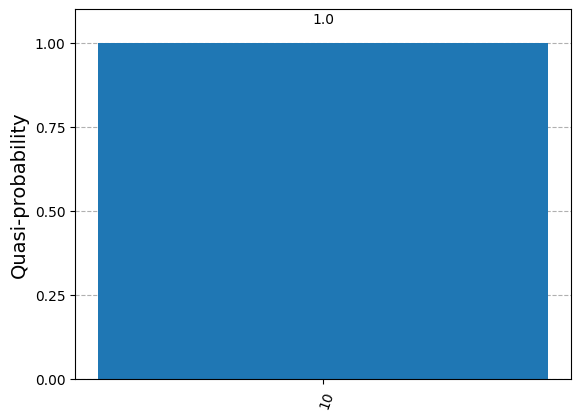

In [51]:
# Use the Sampler to simulate the circuit
sampler = Sampler()
job = sampler.run(circuits=bell, shots=1024)
result = job.result()

# Get the result counts and convert quasi-probabilities to probabilities
counts = result.quasi_dists[0].binary_probabilities()

# print result
print("Measuremet result:", result.quasi_dists[0])

# Plot the result as a histogram
plot_histogram(counts)